In [1]:
#!/usr/bin/env python3

import tables
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#!pwd

## Data preprocessing

In [60]:
def binned_histogram_Areakey(xdata, Eff_A, error, bins=11, quant=68, logspace=True):
    """
    input: xdata and the corresponding percentage error. as np.array
    return: return the bin centers, mean and std of in each bin.
    bins : Number of bins. Shoud be an interger not a list. or array.
    """
    if logspace:
        bins = np.logspace(np.log10(np.min(xdata)), np.log10(np.max(xdata)), bins)
    else:
        bins = np.linspace(np.min(xdata), np.max(xdata), bins)
    
    centers = (bins[1:] + bins[:-1]) / 2.0
    lower = centers - bins[:-1]
    upper = bins[1:] - centers
    
    merit_numbers = []
    error_bars = []
    for lower, upper in zip(bins[:-1], bins[1:]):
        cut = (xdata >= lower) & (xdata < upper)
        
        error_distribution = error[cut]
        energy_distribution = xdata[cut]
        effA = Eff_A[cut]
        
        merit_number = with_AreaKey(error_distribution, effA)
        
        merit_numbers.append(merit_number)
        
        dA = np.std(effA)
        dS = np.std(error_distribution)
        dfdA = np.sum(1/(2 * (4 * np.pi * (error_distribution)**2 * (effA))**(1/2)))
        dfdS = np.sum((-1 * (effA)**(1/2))/(2 * (error_distribution)**2 * (np.pi)**(1/2)))
        U = np.sqrt(dfdS**2 * dS**2 + dfdA**2 * dA**2)
        error_bars.append(U)
        #T = np.sqrt(dA**2+dS**2)
       
    return (
        centers,
        np.array(merit_numbers),
        np.array(error_bars)
    )

In [4]:
def with_AreaKey(angular_error, Effective_area):
    val = (np.sum(Effective_area/(4*np.pi*angular_error**2))**(1/2))
    return val

In [34]:
def get_pure_data(file):
    f = tables.open_file(file)
    
    data_dict = {
        #'event_id': file.root.event_id.cols.value[:],

        #'angular_error_linefit' : np.degrees(file.root.angular_error_linefit.cols.value[:]),
        'angular_error_mmsreco': np.degrees(f.root.angular_error_LLHFit_mmsreco.cols.value[:]),
        #'angular_error_splines_35ns': np.degrees(file.root.angular_error_LLHFit_step1.cols.value[:]),
        #'angular_error_splines_20ns': np.degrees(file.root.angular_error_LLHFit_step2.cols.value[:]),
        #'angular_error_splines_10ns': np.degrees(file.root.angular_error_LLHFit_step3.cols.value[:]),
        #'angular_error_splines_05ns': np.degrees(file.root.angular_error_LLHFit_step4.cols.value[:]),

        #'logl_splines_35ns': file.root.logl_splines_35ns.cols.value[:],
        #'logl_splines_20ns': file.root.logl_splines_20ns.cols.value[:],
        #'logl_splines_10ns': file.root.logl_splines_10ns.cols.value[:],
        #'logl_splines_05ns': file.root.logl_splines_05ns.cols.value[:],
        #'logl_mmsreco': file.root.logl_mmsreco.cols.value[:],
        #'logl_mctruth': file.root.logl_mctruth.cols.value[:],
        #'nchannels_count': file.root.nchannels_count.cols.value[:],
        #'qtotal_clean': file.root.qtotal_clean.cols.value[:],
        #'qtotal_unclean': file.root.qtotal_unclean.cols.value[:],
        #'nhits_clean': file.root.nhits_clean.cols.value[:],
        #'nhits_unclean': file.root.nhits_unclean.cols.value[:],
        #'zenith_angle': np.degrees(file.root.zenith_angle.cols.value[:]),
        #'numu_energy': file.root.numu_energy.cols.value[:],
        'MuonEffectiveArea': f.root.MuonEffectiveArea.cols.value[:],
        'muon_energy': f.root.muon_energy.cols.value[:],
        'dirTrackLengthA_reco': f.root.track_length.cols.value[:]
    }
    
    df = pd.DataFrame(data_dict)
    df = df.dropna()
    
    log_bin, merit_number, error_bars = binned_histogram_Areakey(xdata = df.muon_energy,
                                            Eff_A = df.MuonEffectiveArea,
                                            error=df.angular_error_mmsreco, 
                                            bins=11, 
                                            quant=68,
                                            logspace=True)
    return log_bin, merit_number, error_bars

# Original Multi-Cell method #

In [6]:
# slashes have to be backwards in path
f = tables.open_file("C:/Users/brayd/Documents/single_muons_muongun_reco_spline_sim0002_waterfits_EffectiveArea.hdf5")
f.root

/ (RootGroup) ''
  children := ['__I3Index__' (Group), 'MuonEffectiveArea' (Table), 'angular_error_LLHFit_mmsreco' (Table), 'angular_error_LLHFit_step1' (Table), 'angular_error_LLHFit_step2' (Table), 'angular_error_LLHFit_step3' (Table), 'angular_error_LLHFit_step4' (Table), 'angular_error_linefit' (Table), 'event_id' (Table), 'logl_mmsreco' (Table), 'logl_splines_05ns' (Table), 'logl_splines_10ns' (Table), 'logl_splines_20ns' (Table), 'logl_splines_35ns' (Table), 'muon_energy' (Table), 'nchannels_count' (Table), 'nhits_clean' (Table), 'nhits_unclean' (Table), 'qtotal_clean' (Table), 'qtotal_unclean' (Table), 'track_length' (Table), 'zenith_angle' (Table)]

In [7]:
data_dict = {
    #'event_id': file.root.event_id.cols.value[:],

    #'angular_error_linefit' : np.degrees(file.root.angular_error_linefit.cols.value[:]),
    'angular_error_mmsreco': np.degrees(f.root.angular_error_LLHFit_mmsreco.cols.value[:]),
    #'angular_error_splines_35ns': np.degrees(file.root.angular_error_LLHFit_step1.cols.value[:]),
    #'angular_error_splines_20ns': np.degrees(file.root.angular_error_LLHFit_step2.cols.value[:]),
    #'angular_error_splines_10ns': np.degrees(file.root.angular_error_LLHFit_step3.cols.value[:]),
    #'angular_error_splines_05ns': np.degrees(file.root.angular_error_LLHFit_step4.cols.value[:]),

    #'logl_splines_35ns': file.root.logl_splines_35ns.cols.value[:],
    #'logl_splines_20ns': file.root.logl_splines_20ns.cols.value[:],
    #'logl_splines_10ns': file.root.logl_splines_10ns.cols.value[:],
    #'logl_splines_05ns': file.root.logl_splines_05ns.cols.value[:],
    #'logl_mmsreco': file.root.logl_mmsreco.cols.value[:],
    #'logl_mctruth': file.root.logl_mctruth.cols.value[:],
    #'nchannels_count': file.root.nchannels_count.cols.value[:],
    #'qtotal_clean': file.root.qtotal_clean.cols.value[:],
    #'qtotal_unclean': file.root.qtotal_unclean.cols.value[:],
    #'nhits_clean': file.root.nhits_clean.cols.value[:],
    #'nhits_unclean': file.root.nhits_unclean.cols.value[:],
    #'zenith_angle': np.degrees(file.root.zenith_angle.cols.value[:]),
    #'numu_energy': file.root.numu_energy.cols.value[:],
    'MuonEffectiveArea': f.root.MuonEffectiveArea.cols.value[:],
    'muon_energy': f.root.muon_energy.cols.value[:],
    'dirTrackLengthA_reco': f.root.track_length.cols.value[:]
}

In [8]:
df = pd.DataFrame(data_dict)
df = df.dropna()
df

,angular_error_mmsreco,MuonEffectiveArea,muon_energy,dirTrackLengthA_reco
0,0.135597,9.734735e+10,82413.121514,257.512445
1,34.695274,6.004455e+10,50449.818443,135.333762
3,2.103542,7.693895e+10,64925.967136,238.682905
4,35.217937,8.055803e+09,5902.700981,177.183219
5,0.009549,9.633965e+11,824496.665193,938.181358
...,...,...,...,...
58981,0.009737,2.236337e+11,190622.926582,1087.936516
58982,19.961458,3.639989e+10,30189.636449,93.787862
58983,0.050392,1.403944e+11,119298.453314,159.376226
58984,0.021210,1.562260e+11,132863.936810,643.433948


In [11]:
log_bin, merit_number, error = binned_histogram_Areakey(xdata = df.muon_energy,
                                            Eff_A = df.MuonEffectiveArea,
                                         error=df.angular_error_mmsreco, 
                                         bins=11, 
                                         quant=68,
                                         logspace=True)
print(merit_number)
print(log_bin)

[5.33664105e+04 4.60517346e+05 2.00694816e+06 7.07523445e+06
 1.82009644e+07 6.73027370e+07 1.41980998e+08 7.24323674e+08
 4.15026776e+08 8.47909245e+08]
[1.81930828e+02 4.55240603e+02 1.13913628e+03 2.85042999e+03
 7.13255407e+03 1.78475976e+04 4.46595621e+04 1.11750418e+05
 2.79630056e+05 6.99710745e+05]


# Using Pure Data function to get graphing data #

In [61]:
log_bin_large, merit_number_large, error_large = get_pure_data('C:/Users/brayd/Documents/single_muons_muongun_reco_spline_large_array_EffectiveArea.hdf5')
print(error_large)

[2.44762067e+04 3.11907493e+05 1.33939915e+08 8.13708756e+08
 7.91864376e+09 6.86431908e+11 1.34064371e+12 4.94972107e+12
 1.87539664e+13 5.84480879e+13]


In [16]:
log_bin_large2, merit_number_large2 = get_pure_data("C:/Users/brayd/Documents/single_muons_muongun_reco_spline_large_array2_EffectiveArea.hdf5")
print(merit_number_large2)

In [ ]:
log_bin_tan, merit_number_tan = get_pure_data("C:/Users/brayd/Documents/single_muons_muongun_reco_spline_tanGCD_effectiveArea.hdf5")
print(merit_number_tan)

In [ ]:
log_bin_rec, merit_number_rec = get_pure_data("C:/Users/brayd/Documents/single_muons_muongun_reco_spline_recGCD_EffectiveArea.hdf5")

In [ ]:
log_bin_arrows, merit_number_arrows = get_pure_data("C:/Users/brayd/Documents/single_muons_muongun_reco_spline_Arrows_EffectiveArea.hdf5")

In [ ]:
log_bin_40m, merit_number_40m = get_pure_data("C:/Users/brayd/Documents/single_muons_muongun_reco_spline_40m_spacing_EffectiveArea.hdf5")

In [ ]:
log_bin_large3, merit_number_large3 = get_pure_data("C:/Users/brayd/Documents/single_muons_muongun_reco_spline_Big3_EffectiveArea.hdf5")

In [ ]:
log_bin_large_100, merit_number_large_100 = get_pure_data("C:/Users/brayd/Documents/single_muons_muongun_reco_spline_Large_100m_EffectiveArea.hdf5")

In [ ]:
log_bin_large_250, merit_number_large_250 = get_pure_data("C:/Users/brayd/Documents/single_muons_muongun_reco_spline_Large_250m_EffectiveArea.hdf5")

In [ ]:
log_bin_80x600, merit_number_80x600 = get_pure_data("C:/Users/brayd/Documents/single_muons_muongun_reco_spline_80x600m_EffectiveArea.hdf5")

In [ ]:
log_bin_rec_offset, merit_number_rec_offset = get_pure_data("C:/Users/brayd/Documents/single_muons_muongun_reco_spline_rec_offset_EffectiveArea.hdf5")

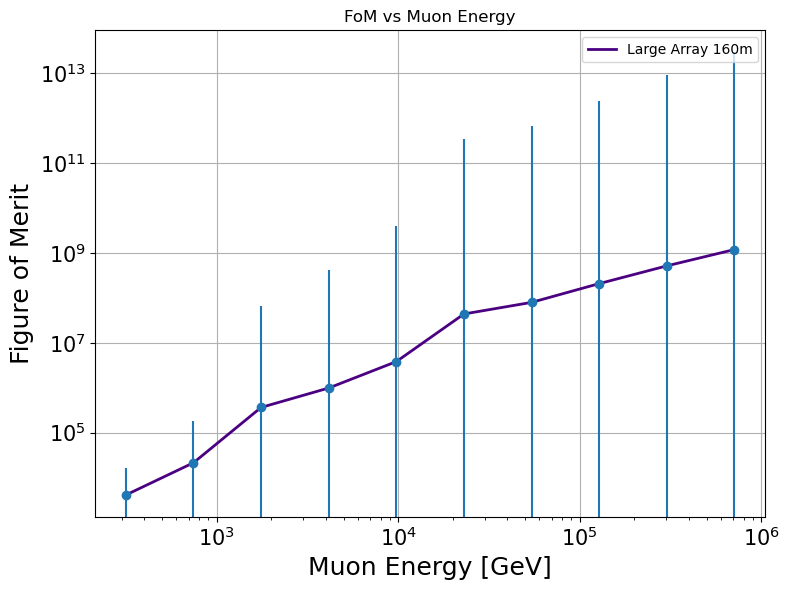

<Figure size 640x480 with 0 Axes>

In [62]:
fig, ax = plt.subplots(figsize=(8,6))
#ax.plot(log_bin, merit_number, lw=2, label = 'Default Array', alpha = 0.2)
#ax.plot(log_bin_40m, merit_number_40m, lw = 2, c = 'red', label = 'Large Array 40m', ls = ':')
#ax.plot(log_bin_large2, merit_number_large2, lw = 2, c = 'orange', label = 'Large Array 80m', alpha = 0.2)
#ax.plot(log_bin_large_100, merit_number_large_100, lw = 2, c = 'green', label = 'Large Array 100m')
#ax.plot(log_bin_large3, merit_number_large3, lw = 2, c = 'blue', label = 'Large Array 120m', ls = '--')
ax.plot(log_bin_large, merit_number_large, lw = 2, c = 'indigo', label = 'Large Array 160m')
ax.errorbar(log_bin_large, merit_number_large, yerr = error_large/2, fmt = 'o')
#ax.plot(log_bin_tan, merit_number_tan, lw = 2, c = 'green', label = 'Tangent Array')
#ax.plot(log_bin_rec, merit_number_rec, lw = 2, c = 'purple', label = 'Rectangle Array')
#ax.plot(log_bin_arrows, merit_number_arrows, lw = 2, c = 'magenta', label = 'Arrow Array')
#ax.plot(log_bin_large_250, merit_number_large_250, lw = 2, c = 'violet', label = 'Large Array 250m')
#ax.plot(log_bin_80x600, merit_number_80x600, lw = 2, c = 'green', label = '80x600', ls = ':')
#ax.plot(log_bin_rec_offset, merit_number_rec_offset, lw = 2, c = 'black', label = 'Offset Rectangles')


ax.set_xlabel("Muon Energy [GeV]", fontsize=18)
ax.set_ylabel("Figure of Merit", fontsize=18)
    
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('FoM vs Muon Energy')
plt.grid()

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
plt.tight_layout()

plt.show()
plt.savefig(fname = 'First4.png', format = 'png');

What is effective area part, should know how individual parts of product look

* Trigger could be causing weirdness, need ratio of simulated events to recorded events. May not know injected events?
simulated events should be input, trigger could be losing events due to low energy. I know how much should be there
* Nevents - look at per file, need number of files.

## Plotting per track length

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

for LDir in [0, 100, 200, 400, 700]:
    data = df.loc[(df['dirTrackLengthA_reco'] > LDir)]
    muon_energy = data.muon_energy
    
    angular_error_mmsreco = data.angular_error_mmsreco
    
    log_bin, merit_number = binned_histogram_Areakey(xdata = df.muon_energy,
                                         Eff_A = df.MuonEffectiveArea,
                                         error = df.angular_error_mmsreco, 
                                         bins = 11, 
                                         quant = 68,
                                         logspace = True)

    ax.plot(log_bin, merit_number, label = f'track length > {LDir} m', lw=2)
    
    ax.set_xlabel("Muon Energy", fontsize=18)
    ax.set_ylabel("Merit value", fontsize=18)
    
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.8)
        ax.spines[axis].set_color('0.0')
        ax.spines[axis].set_linewidth(1.8)
        ax.spines[axis].set_color('0.0')
    
    ax.set_xscale('log')
    ax.legend()
plt.show()

## Plotting Effective Area and Angular Resolution independently vs Muon Energy

In [38]:
def binned_histogram(xdata, error, bins=11, quant=68, logspace=True):
    """
    input: xdata and the corresponding percentage error. as np.array
    return: return the bin centers, mean and std of in each bin.
    bins : Number of bins. Shoud be an interger not a list. or array.
    """
    if logspace:
        bins = np.logspace(np.log10(np.min(xdata)), np.log10(np.max(xdata)), bins)
    else:
        bins = np.linspace(np.min(xdata), np.max(xdata), bins)
    
    centers = (bins[1:] + bins[:-1]) / 2.0
    lower = centers - bins[:-1]
    upper = bins[1:] - centers
    
    yvals = []
    
    for lower, upper in zip(bins[:-1], bins[1:]):
        cut = (xdata >= lower) & (xdata < upper)
        
        error_distribution = error[cut]
        energy_distribution = xdata[cut]
        
        mean = np.mean(error_distribution)
        yvals.append(mean)
    
    return (
        centers,
        np.array(yvals)
    )

In [53]:
def binned_histogram_eff_area(xdata, error, bins=11, quant=68, logspace=True):
    """
    input: xdata and the corresponding percentage error. as np.array
    return: return the bin centers, mean and std of in each bin.
    bins : Number of bins. Shoud be an interger not a list. or array.
    """
    if logspace:
        bins = np.logspace(np.log10(np.min(xdata)), np.log10(np.max(xdata)), bins)
    else:
        bins = np.linspace(np.min(xdata), np.max(xdata), bins)
    
    centers = (bins[1:] + bins[:-1]) / 2.0
    lower = centers - bins[:-1]
    upper = bins[1:] - centers
    
    yvals = []
    
    for lower, upper in zip(bins[:-1], bins[1:]):
        cut = (xdata >= lower) & (xdata < upper)
        
        
        energy_distribution = xdata[cut]
        error_distribution = error[cut]
        
        #mean = np.mean(error_distribution)
        #yvals.append(mean)
        
        hist, _ = np.histogram((energy_distribution), 11, weights = error_distribution)
        yvals.append(np.mean(hist))
    return (
        centers,
        np.array(yvals)
    )

In [54]:
log_bin, angular_res = binned_histogram(df.muon_energy,
                       df.angular_error_mmsreco,
                       bins = 11,
                       quant = 68,
                       logspace = True)

log_bin2, eff_area = binned_histogram_eff_area(df.muon_energy,
                       df.MuonEffectiveArea,
                       bins = 11,
                       quant = 68,
                       logspace = True)
print(log_bin2)
print(eff_area)

[1.81930828e+02 4.55240603e+02 1.13913628e+03 2.85042999e+03
 7.13255407e+03 1.78475976e+04 4.46595621e+04 1.11750418e+05
 2.79630056e+05 6.99710745e+05]
[5.42196543e+09 2.64250697e+10 1.21751166e+11 6.28887971e+11
 3.00554283e+12 1.17676207e+13 3.88531256e+13 1.09350694e+14
 3.02038089e+14 7.88910902e+14]


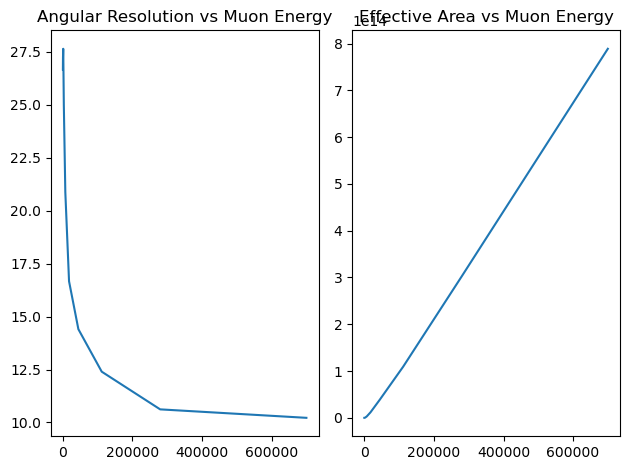

In [55]:
fig, axs = plt.subplots(1, 2)

axs[0].plot(log_bin, angular_res)
axs[0].set_title('Angular Resolution vs Muon Energy')


axs[1].plot(log_bin2, eff_area)
axs[1].set_title('Effective Area vs Muon Energy')

plt.tight_layout()